# Testing Different Classification Models  
I want to try out different kinds of classification models that are available through the scikit-learn library.  
I also want to compare the Logistic Regression model that I made from scratch with the model that is offered by scikit-learn.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Get Data
data = pd.read_csv('./final_data.csv', index_col='count')
data = np.array(data)
X_data = data[:,0:4]
y_data = data[:,4]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=0, stratify=y_data)

### Applying Logisitic Regression

              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66     22995
         1.0       0.66      0.67      0.66     22995

    accuracy                           0.66     45990
   macro avg       0.66      0.66      0.66     45990
weighted avg       0.66      0.66      0.66     45990



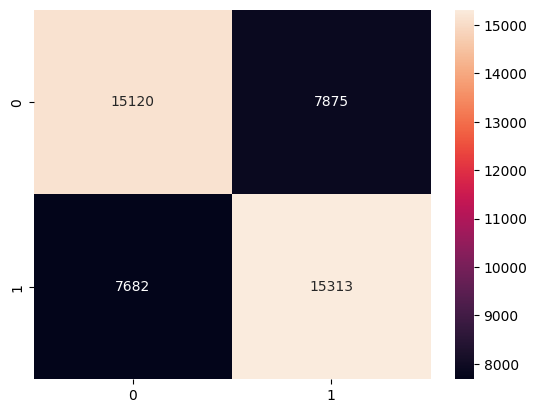

In [4]:
logistic = LogisticRegression(random_state=0)
logistic.fit(X_train, y_train)

predictions = logistic.predict(X_test)

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, predictions))

### Applying Random Forest

/home/justin/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.68      0.67      0.67     22995
         1.0       0.67      0.68      0.68     22995

    accuracy                           0.68     45990
   macro avg       0.68      0.68      0.68     45990
weighted avg       0.68      0.68      0.68     45990



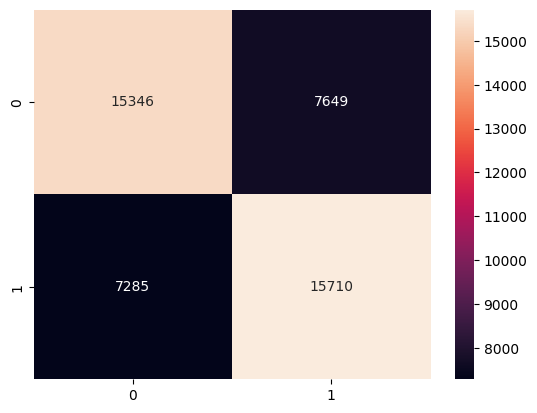

In [5]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 350, 1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt', 0.5]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train[0:46000], y_train[0:46000])

best_params_rf = grid_search.best_params_
rf_model = grid_search.best_estimator_

print("Best Parameters: ", best_params_rf)

predictions = rf_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, predictions))

### Applying SVM

Best Parameters:  {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

         0.0       0.68      0.65      0.66     22995
         1.0       0.66      0.69      0.68     22995

    accuracy                           0.67     45990
   macro avg       0.67      0.67      0.67     45990
weighted avg       0.67      0.67      0.67     45990



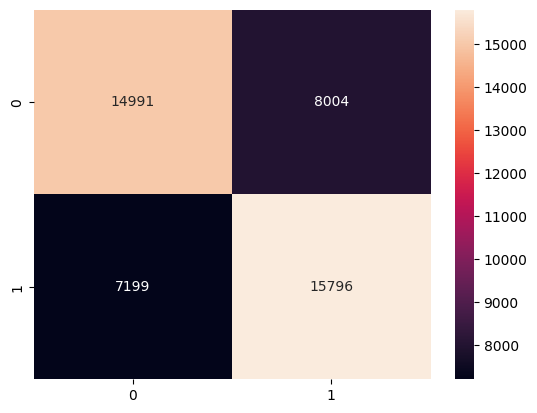

In [7]:
svm = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'gamma': ['scale', 0.1, 1],
    'degree': [2, 3, 4],
}

grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train[0:46000], y_train[0:46000])

best_params_svm = grid_search.best_params_
svm_model = grid_search.best_estimator_

print("Best Parameters: ", best_params_svm)

predictions = svm_model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, predictions))

### Applying KNN

Best Parameters:  {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

         0.0       0.63      0.63      0.63     22995
         1.0       0.63      0.64      0.63     22995

    accuracy                           0.63     45990
   macro avg       0.63      0.63      0.63     45990
weighted avg       0.63      0.63      0.63     45990



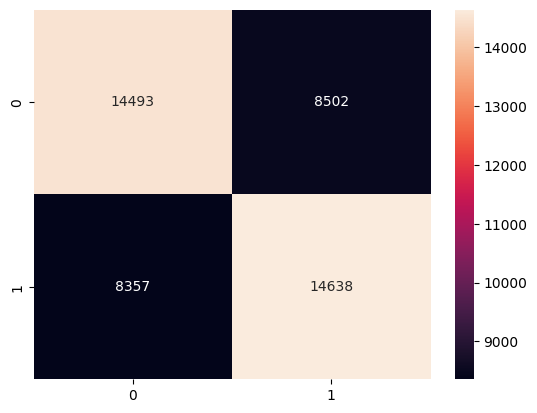

In [5]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}

grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params_knn = grid_search.best_params_
knn_model = grid_search.best_estimator_

print("Best Parameters: ", best_params_knn)

predictions = knn_model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, predictions))
